# LangChain Introduction

In [7]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

True

### Prompts:

1. PromptTemplate qui permet de créer des prompts avec des variables.

In [8]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template("Raconte-moi une blague sur {topic}")

prompt.format(topic="les développeurs")


'Raconte-moi une blague sur les développeurs'

2. ChatPromptTemplate qui permet de créer des prompts structurés avec des messages de différents types (système, utilisateur, assistant) pour les LLMs.

In [9]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages([
    ("system", "Tu es un assistant expert en {domaine}."),
    ("human", "Explique-moi le concept de {concept}."),
])

template.format_messages(domaine="finance", concept="dividendes")

[SystemMessage(content='Tu es un assistant expert en finance.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Explique-moi le concept de dividendes.', additional_kwargs={}, response_metadata={})]

1. FewShotPromptTemplate permet de fournir des exemples au modèle pour guider sa réponse (Few-Shot Learning). Cela améliore considérablement la précision pour des tâches complexes ou des formats spécifiques

In [10]:
from langchain_core.prompts import PromptTemplate, FewShotPromptTemplate

examples = [
    {"input": "Heureux", "output": "Triste"},
    {"input": "Grand", "output": "Petit"},
]

example_prompt = PromptTemplate.from_template("Mot: {input}\nAntonyme: {output}")

prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Mot: {input}\nAntonyme:", # Le nouveau mot à traiter
    input_variables=["input"]
)

prompt.format(input="Rapide")

'Mot: Heureux\nAntonyme: Triste\n\nMot: Grand\nAntonyme: Petit\n\nMot: Rapide\nAntonyme:'

### LLMs & ChatModels:

**Distinction importante**:
- LLMs (Sur LangChain): Sont une interface générale pour interagir avec des modèles de langage, adaptés pour des tâches de génération de texte simples.

- ChatModels: Ce sont des modèles optimisés pour la conversation. Bien qu'ils utilisent souvent un LLM en arrière-plan, leur interface est différente. Ils prennent une liste de messages en entrée et renvoient un Message IA en sortie.

Composants de ChatPromptTemplate importantes pour ChatModels:
**SystemMessage** : Définit le comportement ou la personnalité de l'IA (ex: "Tu es un expert en Python").
**HumanMessage** : Le message envoyé par l'utilisateur.
**AIMessage** : La réponse générée par le modèle.

LLM:

In [11]:
from langchain_openai import OpenAI 

llm = OpenAI()

input_text = "Pourquoi le ciel est-il bleu ?"

response = llm.invoke(input_text)
print(response)





Le ciel est bleu en raison de la diffusion de la lumière. La lumière du soleil est composée de toutes les couleurs de l'arc-en-ciel, mais lorsqu'elle entre en contact avec l'atmosphère terrestre, elle est diffusée dans toutes les directions par les molécules d'air et d'autres particules en suspension dans l'air. Cette diffusion est plus importante pour les courtes longueurs d'onde, telles que le bleu, ce qui explique pourquoi le ciel paraît bleu pour nous. Les autres couleurs sont également diffusées, mais dans une moindre mesure, ce qui donne au ciel sa couleur générale de bleu pâle. Au coucher du soleil, lorsque la lumière doit parcourir une plus grande distance à travers l'atmosphère, les longueurs d'onde plus courtes sont davantage dispersées, laissant place aux couleurs plus chaudes telles que le rouge et l'orange.


ChatModel:

In [12]:

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

chat_model = ChatOpenAI(model="gpt-4o-mini")

messages = [
    SystemMessage(content="Tu es un assistant scientifique concis."),
    HumanMessage(content="Pourquoi le ciel est-il bleu ?")
]

response = chat_model.invoke(messages)
print(response)
print(response.content)

content="Le ciel est bleu en raison de la diffusion de la lumière par l'atmosphère terrestre. La lumière du soleil est constituée de diverses longueurs d'onde, correspondant à différentes couleurs. Lorsque la lumière solaire entre dans l'atmosphère, les courtes longueurs d'onde, comme le bleu, sont diffusées dans toutes les directions par les molécules d'air. Ce phénomène, connu sous le nom de diffusion Rayleigh, est plus efficace pour les longueurs d'onde plus courtes, ce qui fait que le bleu est la couleur prédominante que nous percevons lorsque nous regardons le ciel." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 26, 'total_tokens': 153, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_

### Chains:

**Définition** : Les chaînes sont le cœur de LangChain. Elles permettent de connecter plusieurs composants (Prompts, Modèles, Parsers) en une seule séquence logique exécutable



In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI(model="gpt-4o-mini")
prompt = ChatPromptTemplate.from_template("Raconte une blague sur {topic}")
parser = StrOutputParser()

chain = prompt | model | parser

chain.invoke({"topic": "les ours"})

'Pourquoi les ours ne portent-ils jamais de chaussures ?\n\nParce qu’ils ont déjà des oursons ! 🐻😄'

Chaînes séquentielles:

In [ ]:

# Chaîne 1 : Résume le texte
summary_prompt = ChatPromptTemplate.from_template("Résume ceci : {text}")
summary_chain = summary_prompt | model | StrOutputParser()

# Chaîne 2 : Traduit le résumé 
translation_prompt = ChatPromptTemplate.from_template("Traduis ceci en allemand : {summary}")
translation_chain = translation_prompt | model | StrOutputParser()

# On connecte les deux
# {"summary": summary_chain} signifie que le résultat de summary_chain est passé
# à la variable {summary} de la chaîne suivante
overall_chain = {"summary": summary_chain} | translation_chain

overall_chain.invoke({"text": "Le texte long à traiter..."})

'Bien sûr ! Voici la traduction en allemand : \n\n„Natürlich! Könntest du mir den Text geben, den du möchtest, dass ich zusammenfasse?“'

### LangGraph:
- Définition: LangGraph est une bibliothèque construite par-dessus LangChain.

Elle est spécifiquement conçue pour créer des Agents IA complexes et des systèmes Multi-Agents.

LangGraph transform votre code en graph et vous permet d'intéragir avec de la sorte.

- Concepts clés de LangGraph
  - State: mémoire partagée du graph
  - Nodes
  - Edges 

In [18]:
import os
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage
import operator


model = ChatOpenAI(model="gpt-4o-mini")

# --- 2. Définition de l'État ---
# Nous utilisons 'Annotated' avec 'operator.add' pour que les nouveaux messages
# soient AJOUTÉS à la liste existante au lieu de l'écraser à chaque étape
class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]

# --- 3. Définition des Nœuds (Actions) ---
def call_model(state: AgentState):
    print("🤖 L'agent réfléchit...")
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(AgentState)

workflow.add_node("agent", call_model)

workflow.set_entry_point("agent")

workflow.add_edge("agent", END)

app = workflow.compile()

# --- 5. Exécution ---
print("--- Début de l'exécution ---")
inputs = {"messages": [HumanMessage(content="Bonjour, qui es-tu en une phrase courte ?")]}

result = app.invoke(inputs)

print("\n--- Réponse finale ---")
print(result['messages'][-1].content)

--- Début de l'exécution ---
🤖 L'agent réfléchit...

--- Réponse finale ---
Bonjour ! Je suis un assistant virtuel conçu pour répondre à vos questions et vous aider dans divers domaines.


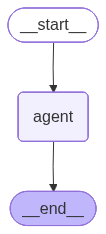

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))